In [1]:
import os
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.3f}'.format)
x_min, x_max = -1., 1.
y_min, y_max = -.3, .3

In [2]:
trn_index_list = np.load("../input/eyn-folds/trn_index_list_10f.npy", allow_pickle=True)
val_index_list = np.load("../input/eyn-folds/val_index_list_10f.npy", allow_pickle=True)
print([np.shape(trn_index_list[i]) for i in range(np.shape(trn_index_list)[0])])
print([np.shape(val_index_list[i]) for i in range(np.shape(val_index_list)[0])])
train_targets_inside = np.load("../input/eyn-original/train_targets_inside.npy")

[(120656,), (120656,), (120656,), (120657,), (120657,), (120657,), (120657,), (120657,), (120657,), (120657,)]
[(13407,), (13407,), (13407,), (13406,), (13406,), (13406,), (13406,), (13406,), (13406,), (13406,)]


In [3]:
df_train = pd.read_pickle("../input/eyn-pre-unravel-df/df_train.pickle")
df_test = pd.read_pickle("../input/eyn-pre-unravel-df/df_test.pickle")
print(df_train.shape, df_test.shape)
df_train.head(7)

(2815323, 23) (703815, 23)


t_entry  t_exit  x_entry   ...     dir_y  dir_x_a  dir_y_a
seq traj                             ...                            
0   0       0.004   0.031   -1.596   ...       nan    0.095    0.996
    1      -0.036  -0.036   -1.599   ...     0.000    0.200    0.980
    2      -0.670  -0.638   -1.602   ...     0.930    0.760    0.649
    3      -0.711  -0.694   -1.603   ...     0.810   -0.041    0.999
    4      -0.766  -0.757   -1.696   ...     0.261   -0.325   -0.946
    5      -0.792  -0.786   -0.989   ...    -0.987      nan      nan
    6         nan     nan      nan   ...       nan      nan      nan

[7 rows x 23 columns]

In [4]:
df_train_cluster = pd.read_pickle("../input/eyn-pre-cluster-calc/df_train_cluster_s.pickle")
df_test_cluster = pd.read_pickle("../input/eyn-pre-cluster-calc/df_test_cluster_s.pickle")
print(df_train_cluster.shape, df_test_cluster.shape)
df_train_cluster = df_train_cluster.astype(float)
df_test_cluster = df_test_cluster.astype(float)
df_train_cluster.head(7)

(2815323, 2) (703815, 2)


sum_entry  sum_exit
seq traj                     
0   0        -0.350       nan
    1        -1.312    -1.312
    2        -4.008    -4.008
    3        -0.980    -0.980
    4        -0.000    -0.000
    5        -0.161    -0.161
    6           nan       nan

In [5]:
df_train = pd.concat([df_train, df_train_cluster], ignore_index=False, axis=1, sort=True)
df_test = pd.concat([df_test, df_test_cluster], ignore_index=False, axis=1, sort=True)
print(df_train.shape)
df_train.head(7)

(2815323, 25)


t_entry  t_exit  x_entry    ...     dir_y_a  sum_entry  sum_exit
seq traj                              ...                                 
0   0       0.004   0.031   -1.596    ...       0.996     -0.350       nan
    1      -0.036  -0.036   -1.599    ...       0.980     -1.312    -1.312
    2      -0.670  -0.638   -1.602    ...       0.649     -4.008    -4.008
    3      -0.711  -0.694   -1.603    ...       0.999     -0.980    -0.980
    4      -0.766  -0.757   -1.696    ...      -0.946     -0.000    -0.000
    5      -0.792  -0.786   -0.989    ...         nan     -0.161    -0.161
    6         nan     nan      nan    ...         nan        nan       nan

[7 rows x 25 columns]

In [6]:
# not using the individual data points
# df_train_cluster = pd.read_pickle("../input/eyn-pre-cluster-calc/df_train_cluster_w.pickle")
# df_test_cluster = pd.read_pickle("../input/eyn-pre-cluster-calc/df_test_cluster_w.pickle")
# print(df_train_cluster.shape, df_test_cluster.shape)
# df_train_cluster = df_train_cluster.astype(float)
# df_test_cluster = df_test_cluster.astype(float)
# df_train_cluster.head(7)

In [7]:
# df_train = pd.concat([df_train, df_train_cluster], ignore_index=False, axis=1, sort=True)
# df_test = pd.concat([df_test, df_test_cluster], ignore_index=False, axis=1, sort=True)
# print(df_train.shape)
# df_train.head(7)

In [8]:
import math
time_dummy_train = []
for i in df_train["t_entry"]:
    entry = np.repeat(0, 16)
    if math.isnan(i):
        time_dummy_train.append([np.nan]*16)
    else:
        num = int((i + 1.5) // 0.1)
        if num != 0:
            entry[num-1] = 1
        time_dummy_train.append(entry)
        
import math
time_dummy_test = []
for i in df_test["t_entry"]:
    entry = np.repeat(0, 16)
    if math.isnan(i):
        time_dummy_test.append([np.nan]*16)
    else:
        num = int((i + 1.5) // 0.1)
        if num != 0:
            entry[num-1] = 1
        time_dummy_test.append(entry)

In [9]:
time_dummy_train = np.array(time_dummy_train)
time_dummy_test = np.array(time_dummy_test)

time_dummy_col_name = ["td{}".format(i) for i in range(16)]

for i,col_name in enumerate(time_dummy_col_name):
    df_train[col_name] = time_dummy_train[:,i]
    df_test[col_name] = time_dummy_test[:,i]
    
df_train[time_dummy_col_name] = df_train[time_dummy_col_name].astype('category')
df_test[time_dummy_col_name] = df_test[time_dummy_col_name].astype('category')
df_train.head(7)

t_entry  t_exit  x_entry  y_entry  ...   td12  td13  td14  td15
seq traj                                     ...                         
0   0       0.004   0.031   -1.596   -0.429  ...  0.000 0.000 1.000 0.000
    1      -0.036  -0.036   -1.599   -0.467  ...  0.000 1.000 0.000 0.000
    2      -0.670  -0.638   -1.602   -0.534  ...  0.000 0.000 0.000 0.000
    3      -0.711  -0.694   -1.603   -0.547  ...  0.000 0.000 0.000 0.000
    4      -0.766  -0.757   -1.696   -0.836  ...  0.000 0.000 0.000 0.000
    5      -0.792  -0.786   -0.989    1.449  ...  0.000 0.000 0.000 0.000
    6         nan     nan      nan      nan  ...    nan   nan   nan   nan

[7 rows x 41 columns]

In [10]:
cat_col = ['entry_in', 'exit_in', 'tid_0', 'tid_1']
df_train[cat_col] = df_train[cat_col].astype('category')
df_test[cat_col] = df_test[cat_col].astype('category')
# cluster targets has been made categorical in eyn-pre-cluster-unif, but can be ensured categorical again here

In [11]:
drop_col = ['x_exit_0', 'y_exit_0', 'vmean_0', 'vmax_0', 'vmin_0', 
             'exit_in_0', 'dist_0', 'speed_0', 'dir_x_0', 'dir_y_0']

df_columns = df_train.columns
flatten = lambda l: [item for sublist in l for item in sublist]
drop_col += flatten([[name + "_" + str(i) for name in df_columns] for i in range(15,21)])
# drop_col = []  # not dropping any columns, if you choose

In [12]:
df_train_unstack = df_train.unstack()
unstack_col_names = ["_".join([tup[0],str(tup[1])]) for tup in df_train_unstack.columns.values]
df_train_unstack.columns = unstack_col_names
df_train_unstack = df_train_unstack.drop(drop_col, axis=1)
df_train_unstack.head()

,t_entry_0,t_entry_1,t_entry_2,t_entry_3,t_entry_4,t_entry_5,t_entry_6,t_entry_7,t_entry_8,t_entry_9,t_entry_10,t_entry_11,t_entry_12,t_entry_13,t_entry_14,t_exit_0,t_exit_1,t_exit_2,t_exit_3,t_exit_4,t_exit_5,t_exit_6,t_exit_7,t_exit_8,t_exit_9,t_exit_10,t_exit_11,t_exit_12,t_exit_13,t_exit_14,x_entry_0,x_entry_1,x_entry_2,x_entry_3,x_entry_4,x_entry_5,x_entry_6,x_entry_7,x_entry_8,x_entry_9,...,td13_5,td13_6,td13_7,td13_8,td13_9,td13_10,td13_11,td13_12,td13_13,td13_14,td14_0,td14_1,td14_2,td14_3,td14_4,td14_5,td14_6,td14_7,td14_8,td14_9,td14_10,td14_11,td14_12,td14_13,td14_14,td15_0,td15_1,td15_2,td15_3,td15_4,td15_5,td15_6,td15_7,td15_8,td15_9,td15_10,td15_11,td15_12,td15_13,td15_14
seq,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.004,-0.036,-0.670,-0.711,-0.766,-0.792,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.031,-0.036,-0.638,-0.694,-0.757,-0.786,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.596,-1.599,-1.602,-1.603,-1.696,-0.989,nan,nan,nan,nan,...,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.001,-0.016,-0.034,-0.051,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.050,-0.016,-0.034,-0.051,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.181,-1.186,-1.181,-1.145,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,-0.042,-0.338,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.033,-0.313,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.216,1.056,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.048,-0.034,-0.051,-0.067,-0.085,-0.105,-0.236,-0.472,-0.506,nan,nan,nan,nan,nan,nan,0.048,-0.002,-0.051,-0.067,-0.085,-0.102,-0.236,-0.472,-0.506,nan,nan,nan,nan,nan,nan,0.696,-0.086,-0.431,-0.116,0.298,0.696,0.696,0.544,0.464,nan,...,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan
4,0.013,-0.387,-0.388,-0.906,-1.432,-1.477,-1.495,-1.500,nan,nan,nan,nan,nan,nan,nan,0.013,-0.335,-0.387,-0.901,-1.432,-1.445,-1.488,-1.495,nan,nan,nan,nan,nan,nan,nan,-1.326,-1.326,-1.336,-1.340,-1.341,-0.088,-0.039,-0.057,nan,nan,...,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan


In [13]:
df_test_unstack = df_test.unstack()
unstack_col_names = ["_".join([tup[0],str(tup[1])]) for tup in df_test_unstack.columns.values]
df_test_unstack.columns = unstack_col_names
df_test_unstack = df_test_unstack.drop(drop_col, axis=1)
df_test_unstack.head()

,t_entry_0,t_entry_1,t_entry_2,t_entry_3,t_entry_4,t_entry_5,t_entry_6,t_entry_7,t_entry_8,t_entry_9,t_entry_10,t_entry_11,t_entry_12,t_entry_13,t_entry_14,t_exit_0,t_exit_1,t_exit_2,t_exit_3,t_exit_4,t_exit_5,t_exit_6,t_exit_7,t_exit_8,t_exit_9,t_exit_10,t_exit_11,t_exit_12,t_exit_13,t_exit_14,x_entry_0,x_entry_1,x_entry_2,x_entry_3,x_entry_4,x_entry_5,x_entry_6,x_entry_7,x_entry_8,x_entry_9,...,td13_5,td13_6,td13_7,td13_8,td13_9,td13_10,td13_11,td13_12,td13_13,td13_14,td14_0,td14_1,td14_2,td14_3,td14_4,td14_5,td14_6,td14_7,td14_8,td14_9,td14_10,td14_11,td14_12,td14_13,td14_14,td15_0,td15_1,td15_2,td15_3,td15_4,td15_5,td15_6,td15_7,td15_8,td15_9,td15_10,td15_11,td15_12,td15_13,td15_14
seq,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.006,-0.157,-0.243,-0.264,-0.328,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.018,-0.128,-0.176,-0.264,-0.316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.222,1.248,0.286,1.230,1.251,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.049,-0.286,-0.686,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.052,-0.278,-0.666,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.908,1.048,1.048,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.044,-0.385,-0.625,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.044,-0.385,-0.616,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.343,-0.555,-0.002,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.059,-0.537,-0.583,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.070,-0.537,-0.583,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.040,-0.955,-0.957,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,-0.010,-0.069,-0.211,-0.619,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.009,-0.042,-0.203,-0.543,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.542,1.536,1.537,-1.354,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [14]:
trn_embedding = np.load("../input/eynembedding/train_lstm.npy")
test_embedding = np.load("../input/eynembedding/test_lstm.npy")
for e in range(len(trn_embedding[0])):
    df_train_unstack["e{}".format(e)] = trn_embedding[:,e]
    df_test_unstack["e{}".format(e)] = test_embedding[:,e]
df_train_unstack.head()

,t_entry_0,t_entry_1,t_entry_2,t_entry_3,t_entry_4,t_entry_5,t_entry_6,t_entry_7,t_entry_8,t_entry_9,t_entry_10,t_entry_11,t_entry_12,t_entry_13,t_entry_14,t_exit_0,t_exit_1,t_exit_2,t_exit_3,t_exit_4,t_exit_5,t_exit_6,t_exit_7,t_exit_8,t_exit_9,t_exit_10,t_exit_11,t_exit_12,t_exit_13,t_exit_14,x_entry_0,x_entry_1,x_entry_2,x_entry_3,x_entry_4,x_entry_5,x_entry_6,x_entry_7,x_entry_8,x_entry_9,...,td14_5,td14_6,td14_7,td14_8,td14_9,td14_10,td14_11,td14_12,td14_13,td14_14,td15_0,td15_1,td15_2,td15_3,td15_4,td15_5,td15_6,td15_7,td15_8,td15_9,td15_10,td15_11,td15_12,td15_13,td15_14,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14
seq,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.004,-0.036,-0.670,-0.711,-0.766,-0.792,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.031,-0.036,-0.638,-0.694,-0.757,-0.786,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.596,-1.599,-1.602,-1.603,-1.696,-0.989,nan,nan,nan,nan,...,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.142,1.698,-0.517,-0.173,-0.154,1.439,0.711,-2.463,0.967,0.834,-1.530,-0.452,0.247,0.125,0.048
1,0.001,-0.016,-0.034,-0.051,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.050,-0.016,-0.034,-0.051,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.181,-1.186,-1.181,-1.145,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.232,-1.077,-0.757,-1.781,0.933,0.384,1.584,1.816,1.049,-0.695,-1.246,-0.252,0.183,0.052,0.008
2,-0.042,-0.338,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.033,-0.313,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.216,1.056,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.341,0.856,4.215,0.207,-2.637,-3.969,-4.036,-4.312,-1.407,-3.851,0.464,1.481,3.623,0.044,1.390
3,0.048,-0.034,-0.051,-0.067,-0.085,-0.105,-0.236,-0.472,-0.506,nan,nan,nan,nan,nan,nan,0.048,-0.002,-0.051,-0.067,-0.085,-0.102,-0.236,-0.472,-0.506,nan,nan,nan,nan,nan,nan,0.696,-0.086,-0.431,-0.116,0.298,0.696,0.696,0.544,0.464,nan,...,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,-0.541,0.787,0.750,1.325,-0.644,-0.808,-0.296,-0.792,-0.852,0.646,0.654,0.553,0.028,-0.037,0.034
4,0.013,-0.387,-0.388,-0.906,-1.432,-1.477,-1.495,-1.500,nan,nan,nan,nan,nan,nan,nan,0.013,-0.335,-0.387,-0.901,-1.432,-1.445,-1.488,-1.495,nan,nan,nan,nan,nan,nan,nan,-1.326,-1.326,-1.336,-1.340,-1.341,-0.088,-0.039,-0.057,nan,nan,...,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,0.760,1.861,-0.322,-0.360,-0.991,0.866,0.124,-1.858,0.799,1.480,-1.504,0.045,0.291,-0.214,-0.021


In [15]:
# coding: utf-8
# pylint: disable = invalid-name, C0111
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

def scoring_package(y_true, y_pred, plotting=False):
    threshold_search = np.arange(0, 1., 0.01)
    f1_arr = [f1_score(y_true, [k > threshold for k in y_pred]) for threshold in threshold_search]
    precision_arr = [precision_score(y_true, [k > threshold for k in y_pred]) for threshold in threshold_search]
    recall_arr = [recall_score(y_true, [k > threshold for k in y_pred]) for threshold in threshold_search]
    
    if plotting:
        plt.figure(figsize=(24,3))
        plt.plot(threshold_search, f1_arr)
        plt.plot(threshold_search, precision_arr)
        plt.plot(threshold_search, recall_arr)
        plt.show()
    
    threshold = threshold_search[np.argmax(f1_arr)]
    y_pred_class = np.array([k > threshold for k in y_pred])
    f1 = f1_score(y_true, y_pred_class)
    precision = precision_score(y_true, y_pred_class)
    recall = recall_score(y_true, y_pred_class)
    roc = roc_auc_score(y_true, y_pred)
    return f1, precision, recall, roc, threshold

In [16]:
df_train_values = df_train.values
df_train_columns = list(df_train.columns)
df_test_values = df_test.values
df_test_columns = list(df_test.columns)
train_last_is_stationary = np.argwhere(df_train_values[::21,df_train_columns.index("dur")] == 0)[:,0]
train_last_not_stationary = np.argwhere(df_train_values[::21,df_train_columns.index("dur")] != 0)[:,0]
test_last_is_stationary = np.argwhere(df_test_values[::21,df_test_columns.index("dur")] == 0)[:,0]
test_last_not_stationary = np.argwhere(df_test_values[::21,df_test_columns.index("dur")] != 0)[:,0]
print(train_last_is_stationary.shape, train_last_not_stationary.shape)
print(test_last_is_stationary.shape, test_last_not_stationary.shape)

train_last_seen_is_inside = np.argwhere(df_train_values[::21,df_train_columns.index("entry_in")] == 1)[:,0]
train_last_seen_not_inside = np.argwhere(df_train_values[::21,df_train_columns.index("entry_in")] == 0)[:,0]
test_last_seen_is_inside = np.argwhere(df_test_values[::21,df_test_columns.index("entry_in")] == 1)[:,0]
test_last_seen_not_inside = np.argwhere(df_test_values[::21,df_test_columns.index("entry_in")] == 0)[:,0]
print(train_last_seen_is_inside.shape, train_last_seen_not_inside.shape)
print(test_last_seen_is_inside.shape, test_last_seen_not_inside.shape)

y_pred_full = np.zeros(np.shape(train_targets_inside))
y_pred_full[np.intersect1d(train_last_is_stationary, train_last_seen_is_inside)] = 1
y_pred_full[np.intersect1d(train_last_is_stationary, train_last_seen_not_inside)] = 0
# print('The F1-PC-RC-ROC of full prediction is: {:.5f}-{:.5f}-{:.5f}-{:.5f} at threshold {:.3f}'
#       .format(*scoring_package(train_targets_inside, y_pred_full)))
test_preds = []

(66998,) (67065,)
(16841,) (16674,)
(38449,) (95614,)
(9544,) (23971,)


In [17]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 63,
    'learning_rate': 0.05,  # dynamic one below
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'verbose': 0,
    'lambda': 0.1,
    'num_threads': 4,
    'seed' : 42,
#     'histogram_pool_size' : 2048  # to restrict memory usage
#     'boost_from_average' : False  # as per warning message
}
num_boost_round = 3000

In [18]:
# inputs: train_pd, train_targets_inside, and test_pd
# probably try https://lightgbm.readthedocs.io/en/latest/Python-API.html#lightgbm.cv, but cluster complications
for fold_num, (trn_index, val_index) in enumerate(zip(trn_index_list, val_index_list)):
    print("Training fold {}, hash: {}".format(fold_num, np.sum(val_index)%999))
    
    x_trn = df_train_unstack.iloc[trn_index]
    x_val = df_train_unstack.iloc[val_index]
    y_trn = pd.DataFrame(train_targets_inside).astype('bool').iloc[trn_index]
    y_val = pd.DataFrame(train_targets_inside).astype('bool').iloc[val_index]
    
    # create dataset for lightgbm
    lgb_train = lgb.Dataset(x_trn, y_trn)
    lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)
    
    gbm = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                    num_boost_round=num_boost_round,
                    early_stopping_rounds=25,
                    learning_rates=lambda iter: 0.1 * (0.995 ** iter),
                    verbose_eval=50)

    # eval
    y_pred = gbm.predict(x_val, num_iteration=gbm.best_iteration)
    print('The F1-PC-RC-ROC score of fold {} is: {:.5f}-{:.5f}-{:.5f}-{:.5f} at threshold {:.3f}'
          .format(fold_num, *scoring_package(y_val, y_pred)))
    y_pred_full[val_index] = y_pred
    
    # testing
    test_pred = gbm.predict(df_test_unstack, num_iteration=gbm.best_iteration)
    test_preds.append(test_pred)

Training fold 0, hash: 847


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.12059	valid_1's binary_logloss: 0.133055
[100]	training's binary_logloss: 0.100946	valid_1's binary_logloss: 0.129155
Early stopping, best iteration is:
[104]	training's binary_logloss: 0.0998953	valid_1's binary_logloss: 0.129064
The F1-PC-RC-ROC score of fold 0 is: 0.89935-0.90347-0.89527-0.98637 at threshold 0.430
Training fold 1, hash: 662


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.119067	valid_1's binary_logloss: 0.144333
[100]	training's binary_logloss: 0.0997482	valid_1's binary_logloss: 0.141947
Early stopping, best iteration is:
[93]	training's binary_logloss: 0.101595	valid_1's binary_logloss: 0.141732
The F1-PC-RC-ROC score of fold 1 is: 0.88784-0.92831-0.85074-0.98321 at threshold 0.550
Training fold 2, hash: 437


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.119328	valid_1's binary_logloss: 0.143667
[100]	training's binary_logloss: 0.099922	valid_1's binary_logloss: 0.140525
Early stopping, best iteration is:
[91]	training's binary_logloss: 0.102315	valid_1's binary_logloss: 0.140376
The F1-PC-RC-ROC score of fold 2 is: 0.89286-0.88669-0.89912-0.98396 at threshold 0.350
Training fold 3, hash: 804


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.12024	valid_1's binary_logloss: 0.138931
[100]	training's binary_logloss: 0.10076	valid_1's binary_logloss: 0.136343
Early stopping, best iteration is:
[93]	training's binary_logloss: 0.102572	valid_1's binary_logloss: 0.136158
The F1-PC-RC-ROC score of fold 3 is: 0.89325-0.91206-0.87521-0.98457 at threshold 0.480
Training fold 4, hash: 689


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.119694	valid_1's binary_logloss: 0.141624
[100]	training's binary_logloss: 0.100245	valid_1's binary_logloss: 0.13778
Early stopping, best iteration is:
[108]	training's binary_logloss: 0.0983936	valid_1's binary_logloss: 0.13762
The F1-PC-RC-ROC score of fold 4 is: 0.89045-0.89168-0.88922-0.98445 at threshold 0.390
Training fold 5, hash: 351


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.119023	valid_1's binary_logloss: 0.144531
[100]	training's binary_logloss: 0.0998593	valid_1's binary_logloss: 0.141314
Early stopping, best iteration is:
[102]	training's binary_logloss: 0.0994365	valid_1's binary_logloss: 0.141272
The F1-PC-RC-ROC score of fold 5 is: 0.89068-0.90262-0.87905-0.98347 at threshold 0.430
Training fold 6, hash: 284


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.119601	valid_1's binary_logloss: 0.141736
[100]	training's binary_logloss: 0.100299	valid_1's binary_logloss: 0.138715
Early stopping, best iteration is:
[112]	training's binary_logloss: 0.0974693	valid_1's binary_logloss: 0.138577
The F1-PC-RC-ROC score of fold 6 is: 0.88746-0.90535-0.87026-0.98425 at threshold 0.470
Training fold 7, hash: 456


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.118909	valid_1's binary_logloss: 0.14575
[100]	training's binary_logloss: 0.0993728	valid_1's binary_logloss: 0.142928
Early stopping, best iteration is:
[123]	training's binary_logloss: 0.0943716	valid_1's binary_logloss: 0.142502
The F1-PC-RC-ROC score of fold 7 is: 0.88727-0.90202-0.87301-0.98316 at threshold 0.450
Training fold 8, hash: 920


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.120172	valid_1's binary_logloss: 0.136761
[100]	training's binary_logloss: 0.100464	valid_1's binary_logloss: 0.132959
Early stopping, best iteration is:
[104]	training's binary_logloss: 0.0994667	valid_1's binary_logloss: 0.132854
The F1-PC-RC-ROC score of fold 8 is: 0.89299-0.91542-0.87163-0.98547 at threshold 0.470
Training fold 9, hash: 869


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[50]	training's binary_logloss: 0.119431	valid_1's binary_logloss: 0.141752
[100]	training's binary_logloss: 0.100169	valid_1's binary_logloss: 0.138269
Early stopping, best iteration is:
[118]	training's binary_logloss: 0.0960903	valid_1's binary_logloss: 0.137947
The F1-PC-RC-ROC score of fold 9 is: 0.88990-0.91715-0.86421-0.98418 at threshold 0.460


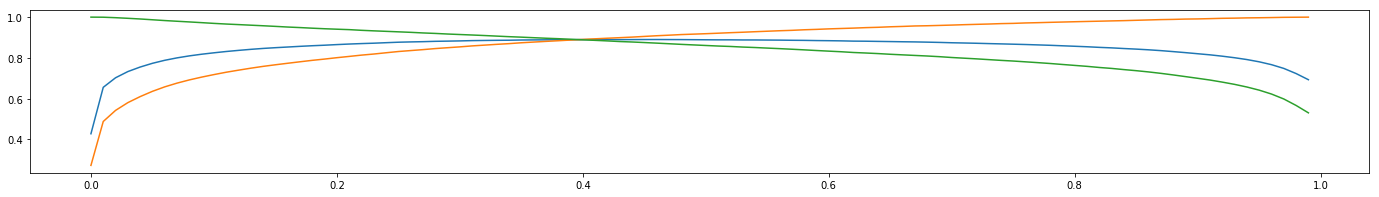

The F1-PC-RC-ROC of full prediction is: 0.89001-0.90852-0.87224-0.98429 at threshold 0.460


In [19]:
scoring_results = scoring_package(train_targets_inside, y_pred_full, plotting=True)
print('The F1-PC-RC-ROC of full prediction is: {:.5f}-{:.5f}-{:.5f}-{:.5f} at threshold {:.3f}'
      .format(*scoring_results))

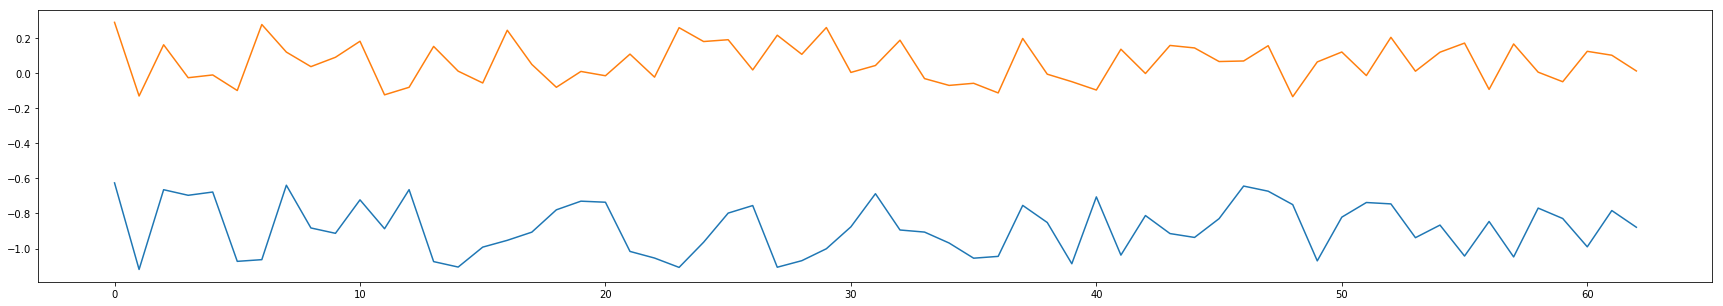

In [20]:
plt.figure(figsize = (30,5))
for i in range(gbm.num_trees())[:2]:
    plt.plot([gbm.get_leaf_output(i,j) for j in range(gbm.params['num_leaves'])])

In [21]:
# very blur cannot see, don't know how to plot just a small part of it
# lags when asked to plot everything
# ax = lgb.plot_tree(gbm, tree_index=0, figsize=(30, 10), 
#               show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])

# doesn't work on Kaggle
# graph = lgb.create_tree_digraph(gbm, tree_index=0, name='Tree54')
# graph.render(view=True)

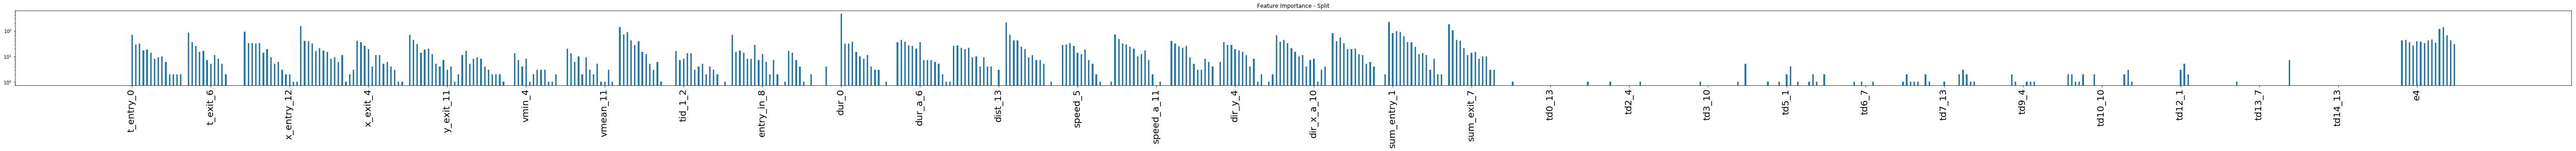

In [22]:
num_features = len(gbm.feature_importance())
plt.figure(figsize=(100,3))
plt.bar(np.arange(num_features), gbm.feature_importance(importance_type='split'), align='center', width=0.4)
plt.xticks(np.arange(0,num_features,21), gbm.feature_name()[::21], rotation='vertical', fontsize=20)
plt.title('Feature Importance - Split')
plt.yscale('log') 
plt.show()

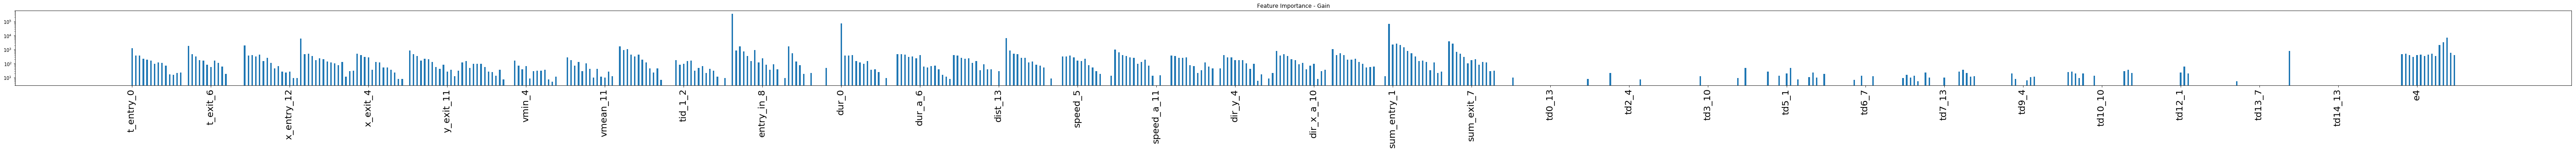

In [23]:
plt.figure(figsize=(100,3))
plt.bar(np.arange(num_features), gbm.feature_importance(importance_type='gain'), align='center', width=0.4)
plt.xticks(np.arange(0,num_features,21), gbm.feature_name()[::21], rotation='vertical', fontsize=20)
plt.title('Feature Importance - Gain')
plt.yscale('log') 
plt.show()

# Submission

In [24]:
print([i[2] for i in test_preds])
print([i[-4] for i in test_preds])
test_preds

[0.9951151729112788, 0.9947909850156448, 0.9962024013662732, 0.9966943057429614, 0.9943111618252496, 0.9954163378804939, 0.9950389163686705, 0.9952393542855197, 0.9961203479520033, 0.9963511101623577]
[0.5413926825861083, 0.33253292102283444, 0.5809931702284716, 0.7299946229101183, 0.6588920283337872, 0.6314855856526359, 0.4206875390391561, 0.6475909826823661, 0.5554743225691164, 0.4127731605445966]


[array([7.03192511e-03, 3.45729994e-03, 9.95115173e-01, ...,
        1.79041168e-03, 5.94756865e-02, 9.39074197e-04]),
 array([0.01032718, 0.00521852, 0.99479099, ..., 0.00230081, 0.01156682,
        0.00113209]),
 array([0.00701802, 0.00444367, 0.9962024 , ..., 0.00212679, 0.05761751,
        0.00158387]),
 array([6.83438619e-03, 3.92997675e-03, 9.96694306e-01, ...,
        1.78288991e-03, 3.92845863e-02, 9.90686815e-04]),
 array([0.00895426, 0.00355128, 0.99431116, ..., 0.00280552, 0.04422036,
        0.00148237]),
 array([0.0061719 , 0.00363834, 0.99541634, ..., 0.00172217, 0.02200799,
        0.00116359]),
 array([0.00451007, 0.00513486, 0.99503892, ..., 0.00193352, 0.01936588,
        0.00125531]),
 array([0.00579989, 0.00454218, 0.99523935, ..., 0.00237791, 0.01143469,
        0.00121839]),
 array([0.00710384, 0.00545247, 0.99612035, ..., 0.00199993, 0.02475987,
        0.00133683]),
 array([0.00501119, 0.00542137, 0.99635111, ..., 0.00236351, 0.02970859,
        0.00166595])]

In [25]:
np.save("train_preds", y_pred_full)
np.save("test_preds", test_preds)

In [26]:
test_preds_mean = np.mean(test_preds, axis=0)
test_preds_mean = np.array([1 if pred>scoring_results[-1] else 0 for pred in test_preds_mean])
print(np.sum(test_preds_mean))

8722


In [27]:
test_preds_mean[np.intersect1d(test_last_is_stationary, test_last_seen_is_inside)] = 1.
test_preds_mean[np.intersect1d(test_last_is_stationary, test_last_seen_not_inside)] = 0.
print(np.sum(test_preds_mean))

8722


In [28]:
df_submit = pd.read_csv("../input/ey-nextwave/data_test/data_test.csv")
df_submit = df_submit[df_submit['x_exit'].isnull()]
df_submit = df_submit[['trajectory_id']].copy()
df_submit = df_submit.rename(columns = {'trajectory_id':'id'})
df_submit['target'] = test_preds_mean
df_submit.to_csv('submission.csv', index=False)

In [29]:
df_submit = pd.read_csv("submission.csv")
df_submit.head()

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0


In [30]:
df_submit.tail()

,id,target
33510,traj_ffe98f6e0adf12f9c7b51c4e9607a87a_15_13,0
33511,traj_fff607ecd3f8d3dcb65791e8b4c22a5f_3_25,1
33512,traj_fff813b56230c2f026f783f5b9f9ca90_19_0,0
33513,traj_fff9400843a88c3bfe52e7ce8bf97316_19_17,0
33514,traj_fff9552047b095e8242b4913f3289a26_25_7,0


In [31]:
print(scoring_results)
print(params)

(0.8900107983788408, 0.9085234918544393, 0.8722374931280924, 0.9842948446455445, 0.46)
{'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'binary_logloss', 'num_leaves': 63, 'learning_rate': 0.05, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'verbose': 0, 'lambda': 0.1, 'num_threads': 4, 'seed': 42}
